In [70]:
import matplotlib.pyplot as plt

import seaborn as sns

# import numpy as np
# import scipy.stats as st
import pandas as pd
import os
import glob
import json
from simsom.utils import *

In [92]:
# # Directory to save figures
# PLOT_DIR = "20240420_quality_timestep_zl5"
# if not os.path.exists(PLOT_DIR):
#     os.makedirs(PLOT_DIR)


# # Styling
plt.style.use("main_stylesheet.mplstyle")
# purple, orange, yellow, pink, blue, cyan
PALETTE = [
    "#550F6B",
    "#F18447",
    "#F8D625",
    "#BC3684",
    "#3863AC",
    "#209B8A",
]

In [93]:
# Directory containing experiment results
RES_DIR = "/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results"
fpaths = glob.glob(f"{RES_DIR}/results_*.json")
data = []
for idx, fpath in enumerate(fpaths):
    fname = os.path.basename(fpath)
    results = json.load(
        open(
            fpath,
            "r",
        )
    )

    res_dict = {
        "fname": fname,
        "max_steps": len(results["quality_timestep"]),
        "rhoepsilon_steps": results["converged_rhoepsilon_timestep"],
        "900th step": results["quality_timestep"][-1],
        "converged by rho-epsilon": results["quality_timestep"][
            results["converged_rhoepsilon_timestep"]
        ],
    }
    data += [res_dict]
df = pd.DataFrame.from_records(data)

In [94]:
df.head()

,fname,max_steps,rhoepsilon_steps,900th step,converged by rho-epsilon
0,results_16.json,917,755,0.738226,0.750879
1,results_11.json,912,879,0.736150,0.725807
2,results_8.json,600,563,0.757488,0.761650
3,results_20.json,929,879,0.733916,0.727691
4,results_3.json,433,382,0.750379,0.762993


In [95]:
df["index"] = df.index

In [96]:
# assuming df is your DataFrame
df_melted = df.melt(
    id_vars=["max_steps", "rhoepsilon_steps", "index"],
    value_vars=["900th step", "converged by rho-epsilon"],
    var_name="type",
    value_name="quality",
)

In [97]:
df_melted.head()

,max_steps,rhoepsilon_steps,index,type,quality
0,917,755,0,900th step,0.738226
1,912,879,1,900th step,0.736150
2,600,563,2,900th step,0.757488
3,929,879,3,900th step,0.733916
4,433,382,4,900th step,0.750379


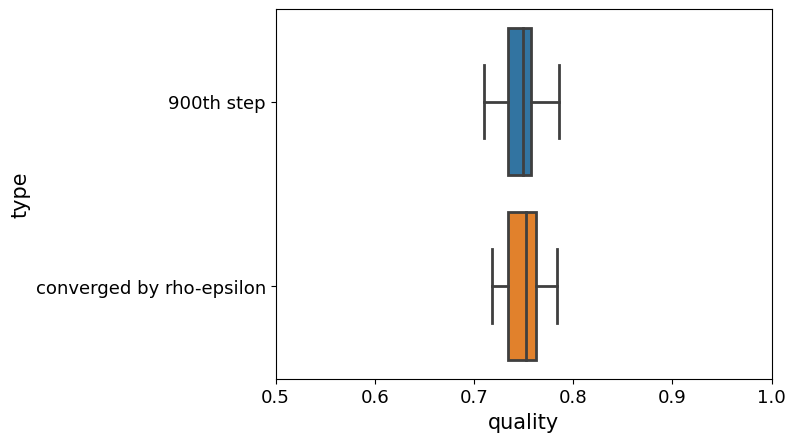

In [105]:
sns.boxplot(data=df_melted, x="quality", y="type")
plt.xlim(0.5, 1)
plt.savefig('boxplot.png', dpi=300,bbox_inches='tight')

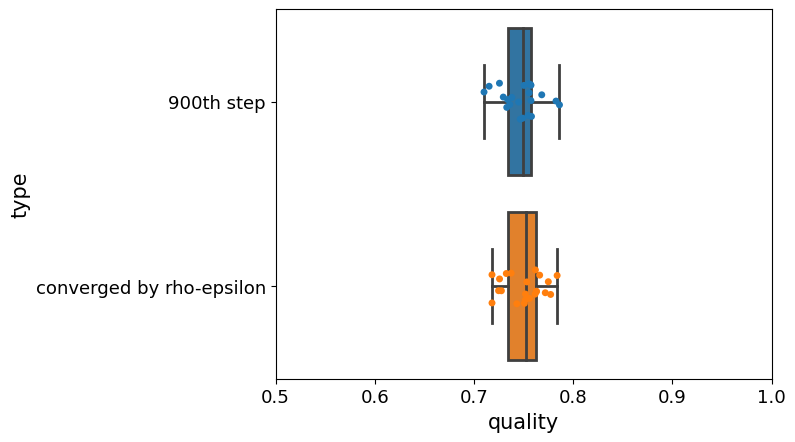

In [106]:
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

ax = sns.boxplot(data=df_melted, x="quality", y="type")
sns.stripplot(data=df_melted, x="quality", y="type", dodge=True, ax=ax, s=5)
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
#           labels=['Smoker', 'Non-smoker'],
#           loc='upper left', handlelength=4,
#           handler_map={tuple: HandlerTuple(ndivide=None)})
plt.xlim(0.5, 1)
plt.savefig('box_strip_plot.png', dpi=300,bbox_inches='tight')

In [78]:
# assuming df is your DataFrame
df_step = df.melt(
    value_vars=["max_steps", "rhoepsilon_steps"], var_name="type", value_name="steps"
)

(0.0, 1000.0)

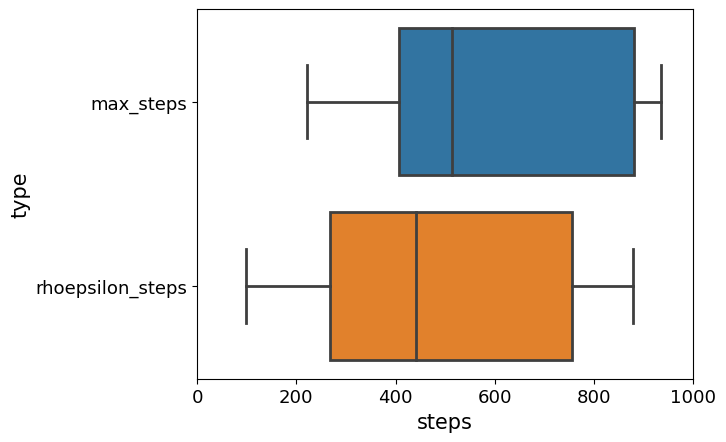

In [79]:
sns.boxplot(data=df_step, x="steps", y="type")
plt.xlim(0, 1000)

## Max step 200

In [ ]:
fpaths

['/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_16.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_11.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_8.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_3.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_12.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_0.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_1.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_15.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_2.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_5.json',
 '/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_6.json',
 '/N/u

In [ ]:
PALETTE[4]

'#3863AC'

/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_16.json
no timestep: 917
converged at: 755
/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_11.json
no timestep: 912
converged at: 879
/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_20.json
no timestep: 929
converged at: 879
/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_2.json
no timestep: 936
converged at: 830
/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results/results_4.json
no timestep: 929
converged at: 871


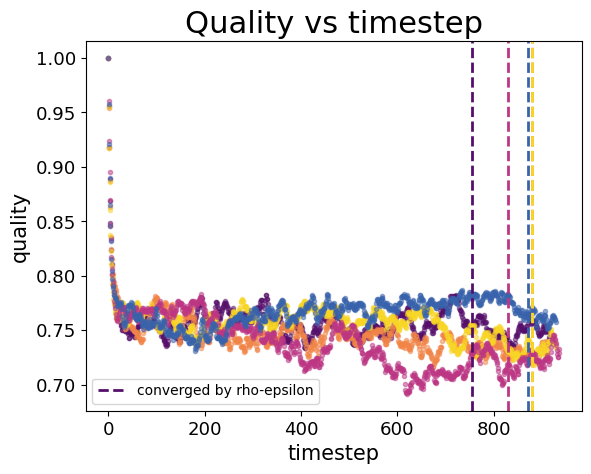

In [107]:
# purple, orange, yellow, pink, blue, cyan
PALETTE = [
    "#550F6B",
    "#F18447",
    "#F8D625",
    "#BC3684",
    "#3863AC",
    "#209B8A",
]
# Directory containing experiment results
RES_DIR = "/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results"
fpaths = glob.glob(f"{RES_DIR}/results_*.json")

RES_DIR_ = "/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000"
fpaths.extend(glob.glob(f"{RES_DIR_}/results_*.json"))
jdx = 0
for idx, fpath in enumerate(fpaths):

    results = json.load(
        open(
            fpath,
            "r",
        )
    )
    if len(results["quality_timestep"]) >= 900:
        if jdx>4:
            break
        
        print(
            f"{fpath}"
            f'\nno timestep: {len(results["quality_timestep"])}'
            f'\nconverged at: {results["converged_rhoepsilon_timestep"]}'
        )
        timesteps = len(results["quality_timestep"])
        plt.scatter(
            range(timesteps),
            results["quality_timestep"],
            s=9,
            alpha=0.5,
            color=PALETTE[jdx],
        )
        # Plot a vertical line at x = 3
        plt.axvline(
            x=results["converged_rhoepsilon_timestep"],
            color=PALETTE[jdx],
            linestyle="--",
            # label='converged by rho-epsilon'
        )
        jdx += 1
# Create a custom legend
plt.legend(handles=[plt.Line2D([], [], linestyle='--', color=PALETTE[0], label='converged by rho-epsilon')])
plt.xlabel("timestep")
plt.ylabel("quality")
plt.title("Quality vs timestep")
plt.savefig('timestep_quality.png', dpi=300,bbox_inches='tight')

## Max step 500

/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_8.json
converged at: 473
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_3.json
converged at: 470
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_0.json
converged at: 500
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_1.json
converged at: 434
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_2.json
converged at: 496
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_5.json
converged at: 497
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_6.json
converged at: 476
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_500/results_9.json
converged at: 492
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/r

Text(0.5, 1.0, 'Quality vs timestep')

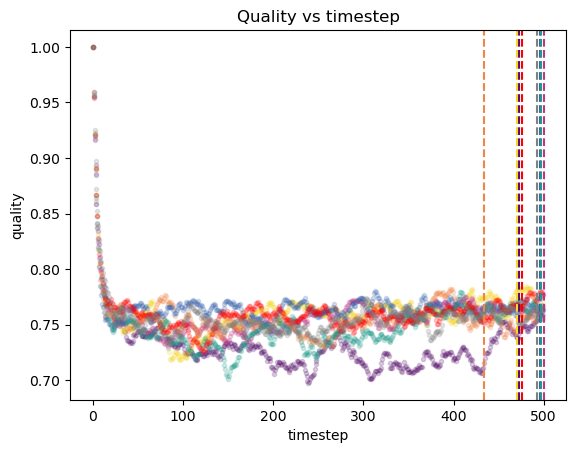

In [ ]:
# Directory containing experiment results
RES_DIR = "/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results_maxsteps_500"
fpaths = glob.glob(f"{RES_DIR}/results_*.json")
for idx, fpath in enumerate(fpaths):

    results = json.load(
        open(
            fpath,
            "r",
        )
    )
    print(f"{fpath}" f'\nconverged at: {results["converged_rhoepsilon_timestep"]}')
    timesteps = len(results["quality_timestep"])
    try:
        plt.scatter(
            range(timesteps),
            results["quality_timestep"],
            s=9,
            alpha=0.2,
            color=PALETTE[idx],
        )
        # Plot a vertical line at x = 3
        plt.axvline(
            x=results["converged_rhoepsilon_timestep"],
            color=PALETTE[idx],
            linestyle="--",
        )
    except:
        pass
plt.xlabel("timestep")
plt.ylabel("quality")
plt.title("Quality vs timestep")

## Max step 1000

In [ ]:
# Directory containing experiment results
RES_DIR = "/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000"

# # Directory to save figures
# PLOT_DIR = "20240420_quality_timestep_zl5"
# if not os.path.exists(PLOT_DIR):
#     os.makedirs(PLOT_DIR)


# # Styling
# plt.style.use("stylesheet.mplstyle")
PALETTE = [
    "#550F6B",
    "#F8D625",
    "#BC3684",
    "#F18447",
    "#3863AC",
    "#209B8A",
    "red",
    "grey",
]

/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000/results_3.json
no timestep: 1000
converged at: 991
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000/results_0.json
no timestep: 1000
converged at: 963
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000/results_1.json
no timestep: 1000
converged at: 976
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000/results_2.json
no timestep: 1000
converged at: 982
/N/u/baotruon/BigRed200/simsom/tests/20240420_quality_timestep/results_maxsteps_1000/results_4.json
no timestep: 1000
converged at: 943


Text(0.5, 1.0, 'Quality vs timestep')

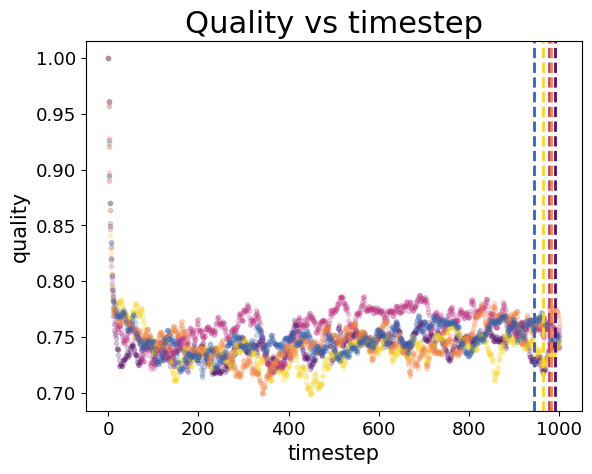

In [ ]:
fpaths = glob.glob(f"{RES_DIR}/results_*.json")
for idx, fpath in enumerate(fpaths):

    results = json.load(
        open(
            fpath,
            "r",
        )
    )
    print(
        f"{fpath}"
        f'\nno timestep: {len(results["quality_timestep"])}'
        f'\nconverged at: {results["converged_rhoepsilon_timestep"]}'
    )
    timesteps = len(results["quality_timestep"])
    plt.scatter(
        range(timesteps),
        results["quality_timestep"],
        s=9,
        alpha=0.2,
        color=PALETTE[idx],
    )
    # Plot a vertical line at x = 3
    plt.axvline(
        x=results["converged_rhoepsilon_timestep"], color=PALETTE[idx], linestyle="--"
    )
plt.xlabel("timestep")
plt.ylabel("quality")
plt.title("Quality vs timestep")

In [ ]:
import random as random

time_step = 0
converge_condition = "(time_step < max_steps) or (quality_diff > epsilon)"
quality = 1
epsilon = 0.01
while converge_condition:
    time_step += 1
    u = random.random()
    v = random.random()
    if u >= 0.5:
        quality_diff = epsilon - v
    else:
        quality_diff = epsilon + v

    print(f"step: {time_step} - qual_diff: {quality_diff}")

In [83]:
time_step = 0
max_steps = 2
quality_diff = 0.5
epsilon = 0.01
converge_condition = "(time_step < max_steps) or (quality_diff > epsilon)"
eval(converge_condition)

True